In [148]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12.5, 9),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Variance

Variance is the one of the most salient elmeents for p-values and confidence intervals. <br> <br>
__Decrease in Variance ->  increase in effect size (or Minimum Detectable Effect) -> better separation of null and alternative hypothesis ->larger Power.__

Overestimated variance leads to false negatives(failure to reject null when it is false) nd underestimated variance leads to false positives (rejecting null when it is true)

# Variance for IID

The standard procedure of hypothesis testing consists of calculation of values from __independent identicaly distributed samples (i.i.d)__. 

In probability theory, a collection of random variables is independent and
identically distributed (IID or i.i.d.), if
- each sample has the same probability distribution as every other sample, and 
- all samples are mutually independent.

We can draw out this conclusion for i.i.d's from probability theory which is applied in hypothesis testing:

For any $n$ independent and identically distributed random variables $X_{1}+X_{2}.......+X_{n}$,
Each random variable $X_{i}$  has the same mean $\mu$ and variance, $\sigma^{2}$, 

$E(X_{i}) = \mu$ and $Var(X_{i}) = \sigma^{2}$ for all $i = 1,2,....,n$

- The expected value of a sum is _always_ the sum of the expected values and the variance of the sum is the sum of the variances. 

when we multiply a random variable by a constant, the mean gets multiplied by the same constant and the variance gets multiplied by that constant squared.

The expected value (the expected value of a random variable is a generalization of the weighted average which is equal to the probability of an event multiplied by the amount of times the vent happens):  
$E(\bar{X}) = \frac{1}{n}E(X_{1}+X_{2}.......+X_{n}) = \frac{1}{n}(n\mu) = \mu$

The variance of the mean:<br>
$Var(\bar{X}) = (\frac{1}{n})^{2}Var(X_{1}+X_{2}.......+X_{n}) = (\frac{1}{n})^{2}n\sigma^{2} = \frac{\sigma^{2}}{n}$

### With the assumption our samples are i.i.d. Hence, we can apply the concept from above:

The standard procedure of calculating the variance of a metric is as follows:

- Collection of $i = 1,......, n$ samples.
- Computing mean metric of interest: 
$\bar{X} = \frac{1}{n}\sum_{i=1}^{n}X_{i}$

- Compute the sample variance: 
$var(X) = \sigma^{2} = \frac{1}{n-1}\sum_{i=1}^{n}(X_{i} - \bar{X})^{2}$

- Compute the variance of the mean metric of interest (sample variance scaled by n) :
$var(\bar{X}) = var(\frac{1}{n}\sum_{i=1}^{n}X_{i}) = \frac{{\sigma }^{2} }{n}$



__Generally, users are iid's but it can also be a session, a page, a user day, etc. The important assumption is that these samples must have the sample probability distribution (likelihood of being sampled) and should be mutually independent (uncorrelated)__

# Violation of IID

Violation of IID can be mostly tied to randomization error. There might be an error in the hashing:

In [151]:

numberList = [1,2,3,4,5]

simulations = 2000
# Numpy's random.choice() to choose elements with different probabilities
sims_notiid = np.empty([simulations, 5])

sims_iid = np.copy(sims_notiid)

not_iid_p=[0.20, 0.25, 0.15, 0.20, 0.20]
correct_iid_p=[0.20,0.20,0.20,0.20,0.20]

for i in range(simulations):
    #incorrect hashing
    sample_noniid = np.random.choice(numberList, 4, p=not_iid_p)
    
    #correct hashing
    sample_iid = np.random.choice(numberList, 4, p=correct_iid_p)
    
    sims_notiid[i,] = [i, np.count_nonzero(sample_noniid == 1), np.count_nonzero(sample_noniid == 2), np.count_nonzero(sample_noniid == 3), np.count_nonzero(sample_noniid == 4)]    
    sims_iid[i,] = [i, np.count_nonzero(sample_iid == 1), np.count_nonzero(sample_iid == 2), np.count_nonzero(sample_iid == 3), np.count_nonzero(sample_iid == 4)] 


Text(0.5, 0.98, 'Importance of assigning equal probablities for iid ')

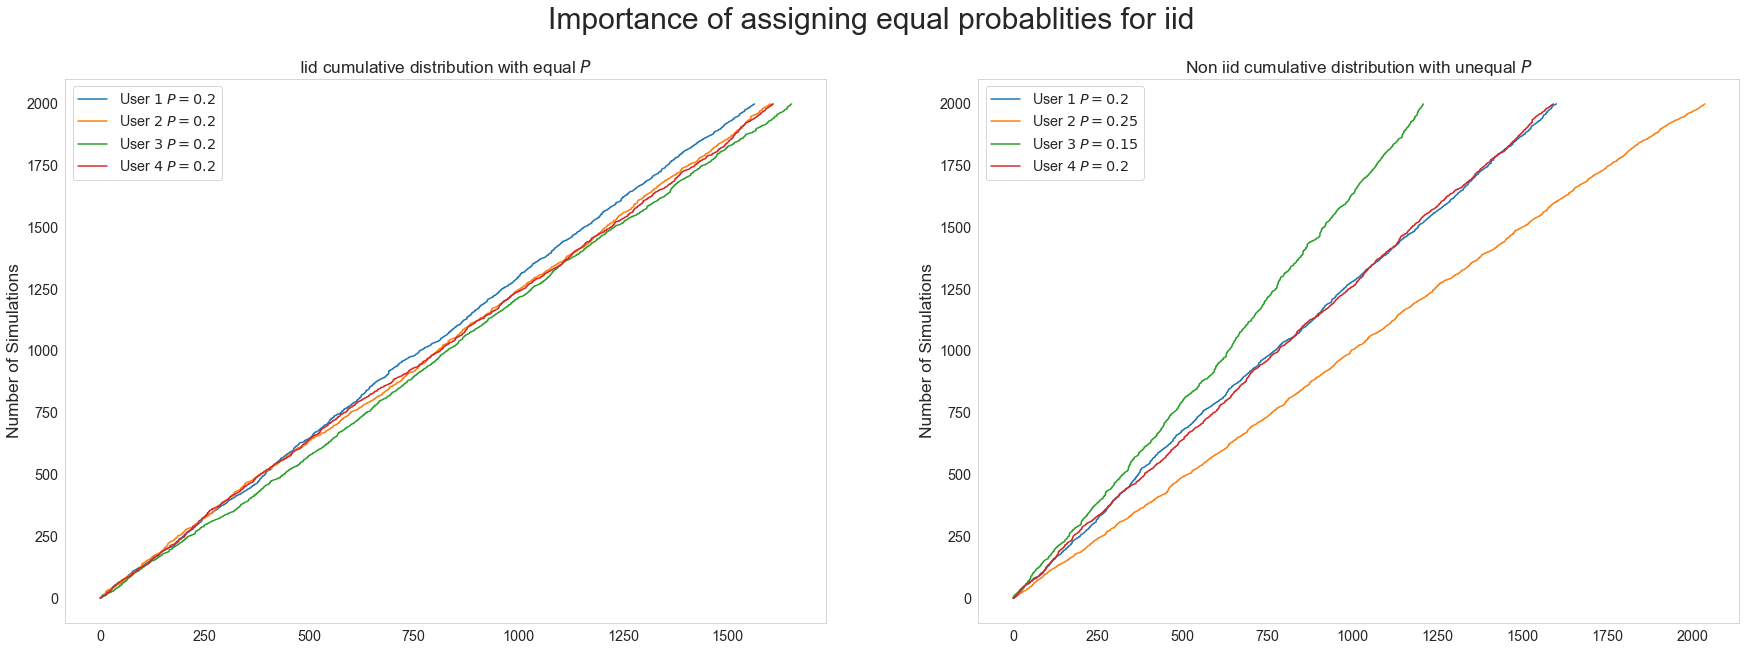

In [155]:
def plot_cumulative(sims, p ):
    plt.plot(np.cumsum(sims[:,1]),sims[:,0], label=f'User $1$ $P={p[0]}$')
    plt.plot(np.cumsum(sims[:,2]),sims[:,0],label=f'User $2$ $P={p[1]}$')
    plt.plot(np.cumsum(sims[:,3]),sims[:,0],label=f'User $3$ $P={p[2]}$')
    plt.plot(np.cumsum(sims[:,4]),sims[:,0],label=f'User $4$ $P={p[3]}$')
    plt.grid(False)
    plt.ylabel('Cumulative Sum of the users')
    plt.ylabel('Number of Simulations')
    plt.legend()

fig = plt.figure(figsize=(30, 10))
ax1 = plt.subplot(1, 2, 1)
plot_cumulative(sims_iid,p =correct_iid_p)
ax1.set_title('Iid cumulative distribution with equal $P$')

ax2 = plt.subplot(1, 2, 2)
plot_cumulative(sims_notiid, p=not_iid_p)
ax2.set_title('Non iid cumulative distribution with unequal $P$')

plt.suptitle('Importance of assigning equal probablities for iid ', fontsize=30)

Resources:

[The Expected Value and Variance of an Average of IID Random Variables](http://scipp.ucsc.edu/~haber/ph116C/iid.pdf)